In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

We load in the expense budget data here:

In [2]:
file_path = r"C:\Users\david\Downloads\Expense_Budget_Funding_-_All_Source_20250923.csv"

nycem = pd.read_csv(file_path)

In [3]:
agency_name = "NEW YORK CITY EMERGENCY MANAGEMENT"  # <-- change this

filtered = nycem[nycem["Agency Number"] == "017"].sort_values(by="Publication Date", ascending=False)

unique_agencies = nycem["Agency Name"].unique()

In [9]:
# filtered.columns

In [5]:
new_columns = ["Publication Date", "Fiscal Year", "Agency Number", "Agency Name", "Personal Service/Other Than Personal Service Indicator", "Total Financial Plan Amount", "Total Adopted Budget Amount", "Total Current Budget Amount", "Federal Funds Financial Plan Amount", "Federal Funds Adopted Budget Amount", "Federal Funds Current Budget Amount", "State  Funds Financial Plan Amount", "State Funds Adopted Budget Amount", "State Funds Current Budget Amount ", "City Funds Financial Plan Amount", "City Funds Adopted Budget Amount", "City Funds Current Budget Amount"]

In [6]:
nycem = filtered[new_columns]

# Ensure Publication Date is datetime
nycem["Publication Date"] = pd.to_datetime(nycem["Publication Date"], format="%Y%m%d", errors="coerce")

# Filter for June (month=6)
june_nycem = nycem[nycem["Publication Date"].dt.month == 6]

def spending(data, type: str):
    return data[
        data["Personal Service/Other Than Personal Service Indicator"].eq(type)
    ]

spending_types = {
    "june_nycem_p": spending(june_nycem, "P"),
    "june_nycem_o": spending(june_nycem, "O")
}

C:\Users\david\AppData\Local\Temp\ipykernel_27184\1315251728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nycem["Publication Date"] = pd.to_datetime(nycem["Publication Date"], format="%Y%m%d", errors="coerce")


In [10]:
# spending_types["june_nycem_p"]

In [8]:
def grapher(data, totals: str, title: str, filename: str, legend_loc: str):
    years = data["Publication Date"].dt.year
    total_values = data[totals] 
    federal_values = data["Federal Funds Current Budget Amount"]
    city_values = data["City Funds Current Budget Amount"]

    plt.figure(figsize=(10, 6))
    plt.rcParams["font.family"] = "monospace"

    ax = plt.gca()
    ax.set_facecolor("lightgrey")

    plt.plot(
        years,
        total_values,
        marker="o",          
        linewidth=2,
        markersize=6,
        color="#007FFF",
        label=totals
    )

    plt.plot(
        years,
        federal_values,
        marker="o",          
        linewidth=2,
        markersize=6,
        color="#FF6F00",
        label="Federal Funds Current Budget Amount"
    )

    plt.plot(
        years,
        city_values,
        marker="o",
        linewidth=2,
        markersize=6,
        color="#FF0000",
        label="City Funds Current Budget Amount"
    )

    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Spending (Dollars)", fontsize=14)

    plt.ylim(0,)

    plt.xticks(sorted(years.unique()))

    plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

    plt.legend(loc=legend_loc, fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

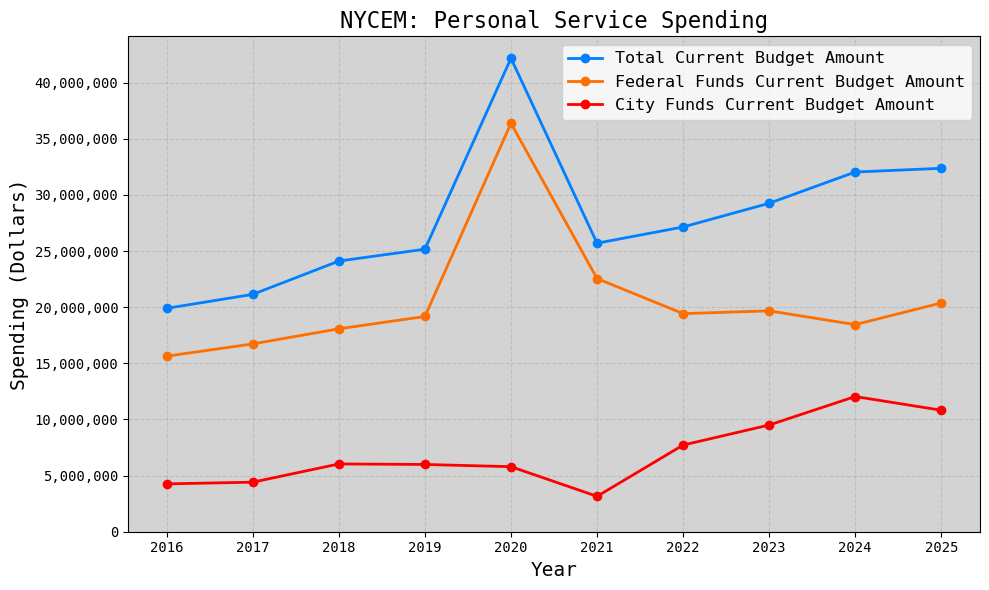

In [39]:
grapher(spending_types["june_nycem_p"], "Total Current Budget Amount", "NYCEM: Personal Service Spending", "nycem_personal_service_spending.png", "upper right")

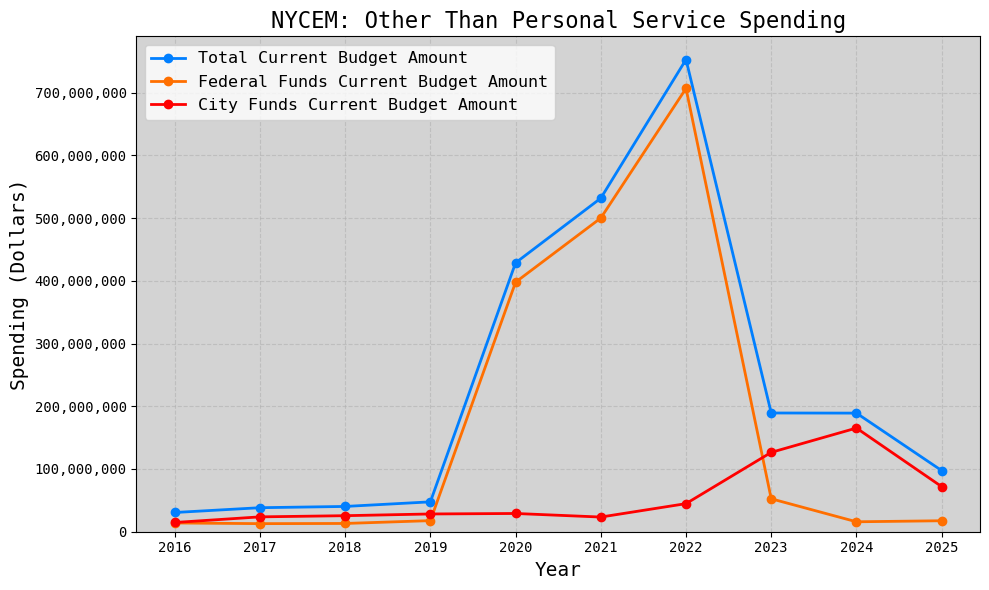

In [38]:
grapher(spending_types["june_nycem_o"], "Total Current Budget Amount", "NYCEM: Other Than Personal Service Spending", "nycem_other_than_personal_service_spending.png", "upper left")

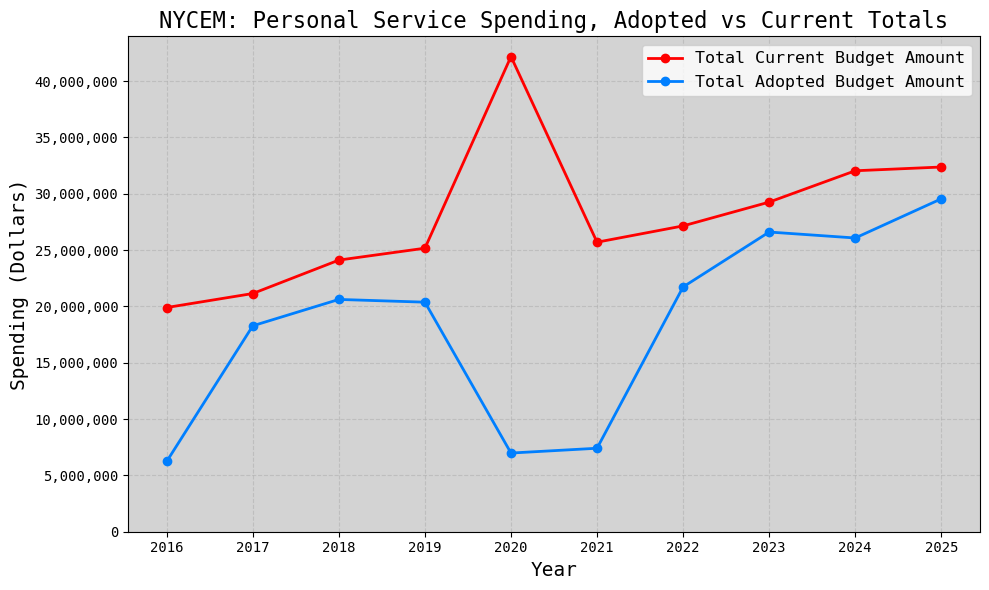

In [49]:
def adopted_grapher(data, totals: str, title: str, filename: str):
    years = data["Publication Date"].dt.year
    total_values_adopted = data[totals] 
    total_values_current = data["Total Current Budget Amount"]

    plt.figure(figsize=(10, 6))
    plt.rcParams["font.family"] = "monospace"

    ax = plt.gca()
    ax.set_facecolor("lightgrey")

    plt.plot(
        years,
        total_values_current,
        marker="o",
        linewidth=2,
        markersize=6,
        color="#FF0000",
        label="Total Current Budget Amount"
    )


    plt.plot(
        years,
        total_values_adopted,
        marker="o",          
        linewidth=2,
        markersize=6,
        color="#007FFF",
        label=totals
    )

    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Spending (Dollars)", fontsize=14)

    plt.ylim(0,)

    plt.xticks(sorted(years.unique()))

    plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

    plt.legend(loc="upper right", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

adopted_grapher(spending_types["june_nycem_p"], "Total Adopted Budget Amount", "NYCEM: Personal Service Spending, Adopted vs Current Totals", "nycem_personal_service_spending_adopted.png")

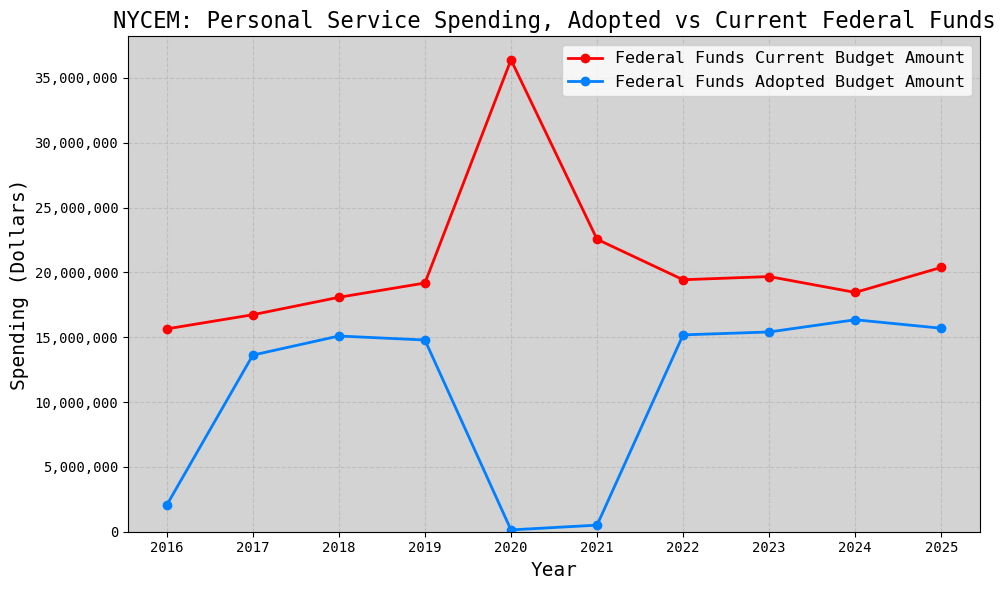

In [48]:
def adopted_grapher_federal(data, adopted: str, title: str, filename: str):
    years = data["Publication Date"].dt.year
    fed_values_adopted = data[adopted] 
    fed_values_current = data["Federal Funds Current Budget Amount"]

    plt.figure(figsize=(10, 6))
    plt.rcParams["font.family"] = "monospace"

    ax = plt.gca()
    ax.set_facecolor("lightgrey")

    plt.plot(
        years,
        fed_values_current,
        marker="o",
        linewidth=2,
        markersize=6,
        color="#FF0000",
        label="Federal Funds Current Budget Amount"
    )

    plt.plot(
        years,
        fed_values_adopted,
        marker="o",          
        linewidth=2,
        markersize=6,
        color="#007FFF",
        label=adopted
    )

    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Spending (Dollars)", fontsize=14)

    plt.ylim(0,)

    plt.xticks(sorted(years.unique()))

    plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

    plt.legend(loc="upper right", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

adopted_grapher_federal(spending_types["june_nycem_p"], "Federal Funds Adopted Budget Amount", "NYCEM: Personal Service Spending, Adopted vs Current Federal Funds", "nycem_personal_service_spending_fed_adopted_current.png")

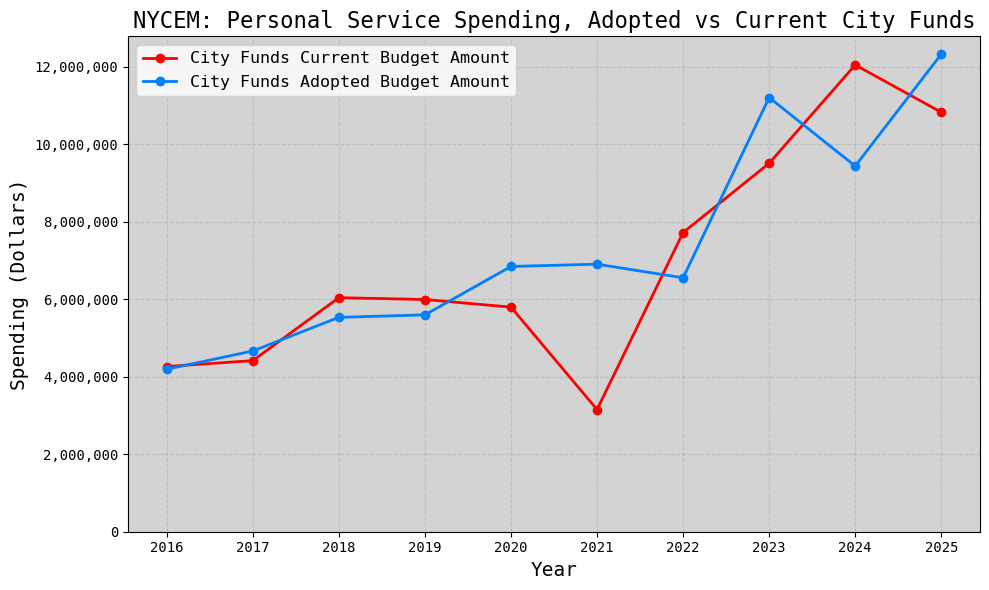

In [52]:
def adopted_grapher_city(data, adopted: str, title: str, filename: str):
    years = data["Publication Date"].dt.year
    fed_values_adopted = data[adopted] 
    fed_values_current = data["City Funds Current Budget Amount"]

    plt.figure(figsize=(10, 6))
    plt.rcParams["font.family"] = "monospace"

    ax = plt.gca()
    ax.set_facecolor("lightgrey")

    plt.plot(
        years,
        fed_values_current,
        marker="o",
        linewidth=2,
        markersize=6,
        color="#FF0000",
        label="City Funds Current Budget Amount"
    )

    plt.plot(
        years,
        fed_values_adopted,
        marker="o",          
        linewidth=2,
        markersize=6,
        color="#007FFF",
        label=adopted
    )

    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Spending (Dollars)", fontsize=14)

    plt.ylim(0,)

    plt.xticks(sorted(years.unique()))

    plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

    plt.legend(loc="upper left", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

adopted_grapher_city(spending_types["june_nycem_p"], "City Funds Adopted Budget Amount", "NYCEM: Personal Service Spending, Adopted vs Current City Funds", "nycem_personal_service_spending_city_adopted_current.png")

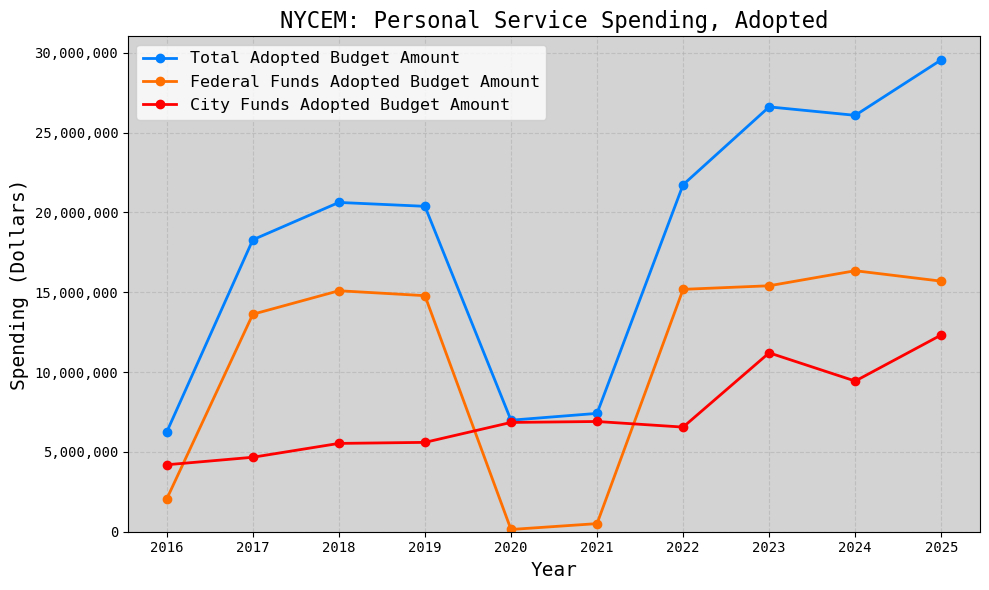

In [34]:
def adopted_grapher_decomposed(data, totals: str, title: str, filename: str):
    years = data["Publication Date"].dt.year
    total_values_adopted = data[totals] 
    federal_values = data["Federal Funds Adopted Budget Amount"]
    city_values = data["City Funds Adopted Budget Amount"]

    plt.figure(figsize=(10, 6))
    plt.rcParams["font.family"] = "monospace"

    ax = plt.gca()
    ax.set_facecolor("lightgrey")

    plt.plot(
        years,
        total_values_adopted,
        marker="o",          
        linewidth=2,
        markersize=6,
        color="#007FFF",
        label=totals
    )

    plt.plot(
        years,
        federal_values,
        marker="o",          
        linewidth=2,
        markersize=6,
        color="#FF6F00",
        label="Federal Funds Adopted Budget Amount"
    )

    plt.plot(
        years,
        city_values,
        marker="o",
        linewidth=2,
        markersize=6,
        color="#FF0000",
        label="City Funds Adopted Budget Amount"
    )

    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Spending (Dollars)", fontsize=14)

    plt.ylim(0,)

    plt.xticks(sorted(years.unique()))

    plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

    plt.legend(loc="upper left", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

adopted_grapher_decomposed(spending_types["june_nycem_p"], "Total Adopted Budget Amount", "NYCEM: Personal Service Spending, Adopted", "nycem_personal_service_spending_adopted_decomposed.png")